# Data Analysis on Economics metrics of countries and Olympics

### What is inside this notebook:
- <p>Introduction</p>
- <p>Goals and objectves</p>
- <p>Data Cleaning and Preprocessing</p>
- <p>Data Analysis</p>
- <p>Exporting Data in CSV files</p>
- <p>Visualization</p>
- <p>Sources</p>

## Introduction

<p>
 The modern Olympic Games or Olympics are the leading international sporting events featuring
summer and winter sports competitions in which thousands of athletes from around the world
participate in a variety of competitions. The Olympic Games are considered the world's foremost
sports competition with more than 200 teams, representing sovereign states and territories.</p>

<p>Performed exploratory Data Analysis using Python to analyze and
visualize past Olympics data and gain valuable insights from it. Also explored trends in
sport and examine the complex connections between sport, economics and gender. This analysis
is expected to help us identify biases and inequality in sport through Olympics history. </p>

![alt text](Olympic_rings.png "Title")

### The aim of this notebook is to answer below questions:

- <p>What countries have the highest female representation and what countries are the lowest?</p>

- <p> What is the recent percentage of women athletes in the Olympics and how did it change over time? 

- <p>What are the top five countries in terms of No of medals achieved throughout the Olympics
history and what is the percentage of female representation in these teams?
</p>

- <p> Does country GDP and expenditure on sport influence the number of medals achieved? Is there any correlation between spending on sport and the number of medals?

## Data Cleaning and preprocessing:

<p>Wbdata is a simple python interface to find and request information from the World Bank’s various databases, either as a dictionary containing full metadata or as a pandas DataFrame. Currently, wbdata wraps most of the World Bank API.

We used two datasets in this project. The first one was a structured csv file which contained the data of 120 years of Olympic games history. This csv file had a lot of information including the name of the participant, his age, number of medals won, nationality, sport that he played, gender, height, weight and more.

The second dataset that we used is a semi-structured data set which contains information like Country’s demographic and economic metrics such as Population, Gross Domestic Product. We fetched this data from the world bank website using their API.</p>

In [35]:
!pip install wbdata

Defaulting to user installation because normal site-packages is not writeable


In [36]:
#Accessing the world bank data 
import wbdata 

#analysis
import pandas as pd
import numpy as np

#Visulization 
import matplotlib.pyplot as plt
import seaborn as sns #for visualization 

In [37]:
%matplotlib inline

In [38]:
athlete_events_df = pd.read_csv('athlete_events.csv') #read the dataset from csv file

In [39]:
athlete_events_df.head() #print the head of the dataframe

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [40]:
countries_df = pd.read_csv('country_definitions.csv') #Read the country definiion dataset

In [41]:
countries_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [42]:
# To do list, cleaning:
#[1] Check for null and missing values
#[2] Check if data is correct and makes senese

In [43]:
#[1] Check for null and missing values
athlete_events_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [44]:
#Since we are not planning to work in Age, Height, Weight columns, we will leave the columns as they are. 

In [45]:
#For the Medal column, NAN can be inerperated as No medal was achieved by that athlete

In [46]:
athlete_events_df.dtypes #types of the fields

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [47]:
athlete_events_df.info() #Exploring the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [48]:
athlete_events_df.describe()  #Summary of numerical columns in the dataset

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [49]:
#Summarize the categorical columns
athlete_events_df_categorical = athlete_events_df[['Team','NOC', 'Games', 'Season', 'City', 'Sport', 'Event', 'Medal']]

In [50]:
athlete_events_df_categorical.describe()

,Team,NOC,Games,Season,City,Sport,Event,Medal
count,271116,271116,271116,271116,271116,271116,271116,39783
unique,1184,230,51,2,42,66,765,3
top,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,17847,18853,13821,222552,22426,38624,5733,13372


In [51]:
countries_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [52]:
#Merge the athlete dataframe with country definitions dataset
athlete_overall = pd.merge(athlete_events_df, countries_df, left_on= 'NOC', right_on = 'NOC')

In [53]:
athlete_overall.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


In [54]:
athlete_overall.isnull().sum()  #Check if the merging caused any null values

ID             0
Name           0
Sex            0
Age         9462
Height     60083
Weight     62785
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     230993
region        21
notes     265728
dtype: int64

In [55]:
athlete_overall[athlete_overall['region'].isnull()].head() # Null values in the region reflect the refugee olympics team. No Action needed 

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
264737,3515,Paulo Amotun Lokoro,M,24.0,170.0,61.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 1,500 metres",NaN,NaN,Refugee Olympic Team
264738,4379,Rami Anis,M,25.0,178.0,78.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Freestyle,NaN,NaN,Refugee Olympic Team
264739,4379,Rami Anis,M,25.0,178.0,78.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Butterfly,NaN,NaN,Refugee Olympic Team
264740,11364,Yiech Pur Biel,M,21.0,178.0,62.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 800 metres,NaN,NaN,Refugee Olympic Team
264741,16287,Mabika Yolande Bukasa,F,28.0,170.0,70.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Judo,Judo Women's Middleweight,NaN,NaN,Refugee Olympic Team


In [56]:
#create a dataframe for year 2016 for Q4 analysis
athlete_overall_2016 = athlete_overall[athlete_overall['Year']==2016]

## Economics Metrics

#### Read in the data:
- <i> using world bank data API</i>

In [57]:
import datetime

In [58]:
#Define the year in which you want to retrive the economic metrics
data_date = datetime.datetime(2016, 1, 1)

In [59]:
#Use the world bank package to explore the dataset
wbdata.get_incomelevel() 

id    value
----  -------------------
HIC   High income
INX   Not classified
LIC   Low income
LMC   Lower middle income
LMY   Low & middle income
MIC   Middle income
UMC   Upper middle income

In [60]:
#set up the countries I want
#countries = ["CL","UY","HU"]
 
#set up the indicator I want (just build up the dict if you want more than one)
#indicators = {'SP.POP.TOTL':'Population, total', '':''}

#incomelevel, high income(HIC) , Low income country LIC, etc.

#Below code create a list of countries for each income level based world bank dataset 
countries_HIC = [i['id'] for i in wbdata.get_country(incomelevel='HIC')]  
countries_INX = [i['id'] for i in wbdata.get_country(incomelevel='INX')]  
countries_LIC = [i['id'] for i in wbdata.get_country(incomelevel='LIC')]  
countries_LMC = [i['id'] for i in wbdata.get_country(incomelevel='LMC')]  
countries_LMY = [i['id'] for i in wbdata.get_country(incomelevel='LMY')]  
countries_MIC = [i['id'] for i in wbdata.get_country(incomelevel='MIC')]  
countries_UMC = [i['id'] for i in wbdata.get_country(incomelevel='UMC')]  

#Dictionary of the indicators we want to retrieve
indicators = {"NY.GDP.PCAP.PP.KD": "gdppc",'SP.POP.TOTL':'Population, total'} 

In [61]:

#Create a dataframe with gdppc and population - for year 2016 and based on the incomelevel
countries_HIC_df = wbdata.get_dataframe(indicators, country=countries_HIC, convert_date=False,data_date =data_date )  
countries_INX_df = wbdata.get_dataframe(indicators, country=countries_INX, convert_date=False,data_date =data_date ) 
countries_LIC_df = wbdata.get_dataframe(indicators, country=countries_LIC, convert_date=False,data_date =data_date ) 
countries_LMC_df = wbdata.get_dataframe(indicators, country=countries_LMC, convert_date=False,data_date =data_date ) 
countries_LMY_df = wbdata.get_dataframe(indicators, country=countries_LMY, convert_date=False,data_date =data_date )  
countries_MIC_df = wbdata.get_dataframe(indicators, country=countries_MIC, convert_date=False,data_date =data_date )  
countries_UMC_df = wbdata.get_dataframe(indicators, country=countries_UMC, convert_date=False,data_date =data_date )



In [62]:
#Create the income level column
countries_UMC_df['income_level'] = "Upper middle income"
countries_HIC_df['income_level']  =  "High income" 
countries_INX_df['income_level']  = "Not classified"
countries_LIC_df['income_level']  = "Low income"
countries_LMC_df['income_level']  =  "Low & middle income"
countries_LMY_df['income_level']  =   "Low & middle income"
countries_MIC_df['income_level']  =  "Middle income"

In [63]:
countries_HIC_df.reset_index(inplace = True)
countries_INX_df.reset_index(inplace = True)
countries_LIC_df.reset_index(inplace = True)
countries_LMC_df.reset_index(inplace = True)
countries_LMY_df.reset_index(inplace = True)
countries_MIC_df.reset_index(inplace = True)
countries_UMC_df.reset_index(inplace = True)

In [64]:
#Create an intermedicate dfs
x = pd.DataFrame(countries_HIC_df) 
x1 = pd.DataFrame(countries_INX_df) 
x2 = pd.DataFrame(countries_LIC_df) 
x3 = pd.DataFrame(countries_LMC_df) 
x4= pd.DataFrame(countries_LMY_df) 
x5 = pd.DataFrame(countries_MIC_df) 
x6 = pd.DataFrame(countries_UMC_df) 

In [65]:
type(x)

pandas.core.frame.DataFrame

In [66]:
#Concatinate all dataframes to create one big dataframe
overall_economic_metrics = pd.concat([x,x1,x2,x3,x4,x5,x6])

In [67]:
overall_economic_metrics['date'] = 2016

In [68]:
overall_economic_metrics.head() #Final output

,country,gdppc,"Population, total",income_level,date
0,Aruba,37043.698152,104874.0,High income,2016
1,Andorra,NaN,72540.0,High income,2016
2,United Arab Emirates,71244.585815,8994263.0,High income,2016
3,American Samoa,NaN,50448.0,High income,2016
4,Antigua and Barbuda,20267.548757,90564.0,High income,2016


In [69]:
overall_economic_metrics.isnull().sum() #check for null values

country               1
gdppc                30
Population, total     0
income_level          0
date                  0
dtype: int64

In [70]:
#Drop tha null values 
overall_economic_metrics = overall_economic_metrics[overall_economic_metrics['gdppc'].notna()]

In [71]:
overall_economic_metrics.isnull().sum()  #check for null values

country              0
gdppc                0
Population, total    0
income_level         0
date                 0
dtype: int64

# Analysis

<p>In th section analysis will be made to answer below main questions:</p>

### 1-What countries have the highest female representation and what countries are the lowest?

##### UNit of Analysis: team

In [72]:
athlete_overall.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


In [73]:
athlete_series = athlete_overall.groupby(['region'])['Sex'].value_counts() #group  by region and get the value count of each gender

In [74]:
athlete_by_country = pd.DataFrame(athlete_series).rename(columns = {'Sex' : 'value_count'}).reset_index() #Reformating

In [75]:
athlete_by_country.head(5) 

,region,Sex,value_count
0,Afghanistan,M,121
1,Afghanistan,F,5
2,Albania,M,43
3,Albania,F,27
4,Algeria,M,457


In [76]:
athlete_by_country_df = athlete_by_country.pivot(index='region', columns='Sex', values='value_count')  #Reformating

In [77]:
athlete_by_country_df.head() #print out the head 

Sex,F,M
region,,
Afghanistan,5,121
Albania,27,43
Algeria,94,457
American Samoa,7,30
Andorra,42,127


In [78]:
#Calculate the total no of thletes
athlete_by_country_df['total'] = athlete_by_country_df['M'] + athlete_by_country_df['F']

In [79]:
#Calculate the female participants percentage from the total
athlete_by_country_df['female_percentage'] = 100*(athlete_by_country_df['F']/ athlete_by_country_df['total'])

In [80]:
athlete_by_country_df.sort_values(by = 'F', ascending= False ).head(10) #order the result decendingly 

Sex,F,M,total,female_percentage
region,,,,
USA,5533,13320,18853,29.348114
Germany,4849,11034,15883,30.529497
Russia,4105,7587,11692,35.109477
Canada,3563,6171,9734,36.603657
UK,3277,8979,12256,26.737924
China,2992,2834,5826,51.355990
France,2781,9977,12758,21.798087
Japan,2779,5665,8444,32.910943
Australia,2751,4973,7724,35.616261


In [81]:
athlete_by_country_df.sort_values(by = 'F' ).head(10) #reorder bases on F = Female colum ascendingly. lower countries in term of female participation

Sex,F,M,total,female_percentage
region,,,,
South Sudan,1,2,3,33.333333
Nauru,2,11,13,15.384615
Brunei,2,8,10,20.000000
Kiribati,3,8,11,27.272727
Oman,4,62,66,6.060606
Yemen,4,44,48,8.333333
Kuwait,4,280,284,1.408451
Kosovo,5,3,8,62.500000
Mauritania,5,24,29,17.241379


In [82]:
athlete_by_country_df.sort_values(by = 'female_percentage', ascending= False ).head(10) #Reorder

Sex,F,M,total,female_percentage
region,,,,
Kosovo,5,3,8,62.500000
Timor-Leste,5,4,9,55.555556
Palau,13,12,25,52.000000
China,2992,2834,5826,51.355990
Cape Verde,9,9,18,50.000000
Marshall Islands,7,7,14,50.000000
North Korea,396,411,807,49.070632
Angola,129,138,267,48.314607
Bhutan,17,19,36,47.222222


In [83]:
athlete_by_country_df.sort_values(by = 'female_percentage' ).head(10) #Reorder based on female percentage column, lower country

Sex,F,M,total,female_percentage
region,,,,
Kuwait,4,280,284,1.408451
Pakistan,11,551,562,1.957295
Saudi Arabia,5,225,230,2.173913
Iraq,7,225,232,3.017241
Qatar,7,185,192,3.645833
Afghanistan,5,121,126,3.968254
United Arab Emirates,7,137,144,4.861111
Oman,4,62,66,6.060606
Syria,17,262,279,6.093190


### 2- What is the recent percentage of women athletes in the Olympics and how did it change over time?

In [84]:
athlete_year_series = athlete_overall.groupby(['Year'])['Sex'].value_counts() #Group by year and calculate the count of female/male participants on that year

In [85]:
athlete_year_series.head(10) #Explore

Year  Sex
1896  M       380
1900  M      1903
      F        33
1904  M      1285
      F        16
1906  M      1722
      F        11
1908  M      3054
      F        47
1912  M      3953
Name: Sex, dtype: int64

In [86]:
athlete_by_year = pd.DataFrame(athlete_year_series).rename(columns = {'Sex' : 'value_count'}).reset_index()  #Reformating

In [87]:
athlete_by_year.head() #explore

,Year,Sex,value_count
0,1896,M,380
1,1900,M,1903
2,1900,F,33
3,1904,M,1285
4,1904,F,16


In [88]:
athlete_by_year_pivot = athlete_by_year.pivot(index='Year', columns='Sex', values='value_count')  #Reformating

In [89]:
athlete_by_year_pivot.fillna(0, inplace= True ) #fill nan value by 0 

In [90]:
athlete_by_year_pivot.head() #explore

Sex,F,M
Year,,
1896,0.0,380.0
1900,33.0,1903.0
1904,16.0,1285.0
1906,11.0,1722.0
1908,47.0,3054.0


In [91]:
#claculate the female percentage from the total
athlete_by_year_pivot['female_percentage'] = athlete_by_year_pivot['F']/(athlete_by_year_pivot['F']+athlete_by_year_pivot['M'])

In [92]:
#claculate the male percentage from the total
athlete_by_year_pivot['male_percentage'] = athlete_by_year_pivot['M']/(athlete_by_year_pivot['F']+athlete_by_year_pivot['M'])

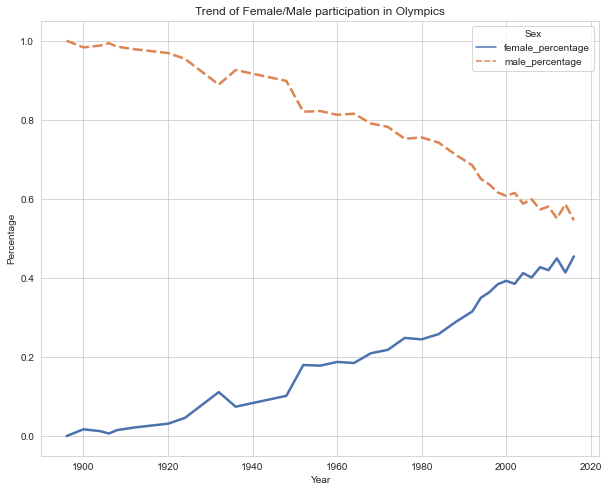

In [93]:
#Plot the female participation percentage against male percentage over years 
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))
ax = sns.lineplot(data=athlete_by_year_pivot[['female_percentage','male_percentage']], linewidth=2.5,   palette='deep')
ax.set(xlabel='Year', ylabel='Percentage', title='Trend of Female/Male participation in Olympics'), 
#ax.legend(title='Players', title_fontsize = 13)
#plotting
plt.show()

In [94]:
athlete_by_year_pivot.head(10) #Explore

Sex,F,M,female_percentage,male_percentage
Year,,,,
1896,0.0,380.0,0.000000,1.000000
1900,33.0,1903.0,0.017045,0.982955
1904,16.0,1285.0,0.012298,0.987702
1906,11.0,1722.0,0.006347,0.993653
1908,47.0,3054.0,0.015156,0.984844
1912,87.0,3953.0,0.021535,0.978465
1920,134.0,4158.0,0.031221,0.968779
1924,261.0,5432.0,0.045846,0.954154
1928,437.0,5137.0,0.078400,0.921600


### 3- What are the top five countries in terms of No of medals achieved throughout the Olympics history and what is the percentage of female representation in these teams?

In [95]:
thlete_medals_series = athlete_overall.groupby(['region'])['Medal'].value_counts() #Group by region and calculate the count of medals received by country participants

In [96]:
thlete_medals_series.head(10)

region       Medal 
Afghanistan  Bronze     2
Algeria      Bronze     8
             Gold       5
             Silver     4
Argentina    Silver    92
             Bronze    91
             Gold      91
Armenia      Bronze     9
             Silver     5
             Gold       2
Name: Medal, dtype: int64

In [97]:
#Transform pandas series into dataframe
athlete_by_region_medal = pd.DataFrame(thlete_medals_series).rename(columns = {'Medal' : 'value_count'}).reset_index()

In [98]:
athlete_by_region_medal.head(4)

,region,Medal,value_count
0,Afghanistan,Bronze,2
1,Algeria,Bronze,8
2,Algeria,Gold,5
3,Algeria,Silver,4


In [99]:
athlete_by_region_medal_pivot =athlete_by_region_medal.pivot(index='region', columns='Medal', values='value_count') #Reformatting

In [100]:
athlete_by_region_medal_pivot.head(3) #Explore

Medal,Bronze,Gold,Silver
region,,,
Afghanistan,2.0,NaN,NaN
Algeria,8.0,5.0,4.0
Argentina,91.0,91.0,92.0


In [101]:
#Calculate the total
athlete_by_region_medal_pivot['total'] = athlete_by_region_medal_pivot['Bronze'].add(athlete_by_region_medal_pivot['Gold'],athlete_by_region_medal_pivot['Silver'], fill_value=0)

In [102]:
top_10 = athlete_by_region_medal_pivot.sort_values(by = 'total', ascending= False ).head(10) #Get the total number of medals

In [103]:
top_10

Medal,Bronze,Gold,Silver,total
region,,,,
USA,1358.0,2638.0,1641.0,3996.0
Russia,1178.0,1599.0,1170.0,2777.0
Germany,1260.0,1301.0,1195.0,2561.0
UK,651.0,678.0,739.0,1329.0
France,666.0,501.0,610.0,1167.0
Italy,531.0,575.0,531.0,1106.0
Sweden,535.0,479.0,522.0,1014.0
Canada,451.0,463.0,438.0,914.0
Australia,522.0,368.0,459.0,890.0


In [104]:
top_10_list = list(top_10.index)

In [105]:
#Get the female percentage in the top 10 countries
athlete_by_country_df[athlete_by_country_df.index.isin(top_10_list)].sort_values(by = 'female_percentage', ascending = False )

Sex,F,M,total,female_percentage
region,,,,
Canada,3563,6171,9734,36.603657
Australia,2751,4973,7724,35.616261
Russia,4105,7587,11692,35.109477
Germany,4849,11034,15883,30.529497
USA,5533,13320,18853,29.348114
UK,3277,8979,12256,26.737924
Hungary,1748,4859,6607,26.456788
Sweden,1985,6354,8339,23.803813
Italy,2543,8172,10715,23.733084


In [106]:
 athlete_by_country_df.head() #Explore

Sex,F,M,total,female_percentage
region,,,,
Afghanistan,5,121,126,3.968254
Albania,27,43,70,38.571429
Algeria,94,457,551,17.059891
American Samoa,7,30,37,18.918919
Andorra,42,127,169,24.852071


### 4- Does country GDP and expenditure on sport influence the number of medals achieved? Is there any correlation between the two?

In [107]:
overall_economic_metrics.head()  #Explore

,country,gdppc,"Population, total",income_level,date
0,Aruba,37043.698152,104874.0,High income,2016
2,United Arab Emirates,71244.585815,8994263.0,High income,2016
4,Antigua and Barbuda,20267.548757,90564.0,High income,2016
5,Australia,48109.202715,24190907.0,High income,2016
6,Austria,53345.741526,8736668.0,High income,2016


In [108]:
athlete_overall_2016.head()  #Explore

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN
5,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,NaN,China,NaN
23,6849,Bai Faquan,M,30.0,173.0,66.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Triathlon,Triathlon Men's Olympic Distance,NaN,China,NaN
34,7598,Bao Yuqing,F,22.0,173.0,55.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Group,NaN,China,NaN
37,11222,Bi Shengfeng,M,27.0,183.0,87.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Light-Heavyweight, Freestyle",NaN,China,NaN


In [109]:
#Group by the region and calculate the number of medals of every region in 2016
athlete_by_region_medal_2016_series = athlete_overall_2016.groupby(['region'])['Medal'].value_counts() 

In [110]:
athlete_by_region_medal_2016_series.head()  #Explore

region     Medal 
Algeria    Silver     2
Argentina  Gold      21
           Silver     1
Armenia    Silver     3
           Gold       1
Name: Medal, dtype: int64

In [111]:
#Reformating, pandas series into df
athlete_by_region_medal_2016 = pd.DataFrame(athlete_by_region_medal_2016_series).rename(columns = {'Medal' : 'value_count'}).reset_index()

In [112]:
#Reformating
athlete_by_region_medal_pivot =athlete_by_region_medal_2016.pivot(index='region', columns='Medal', values='value_count')

In [113]:
#Remove null values if found
athlete_by_region_medal_pivot.fillna(0, inplace = True)

In [114]:
#Calculate the total number of medals acheived by every country in 2016
athlete_by_region_medal_pivot['total'] = athlete_by_region_medal_pivot['Bronze'] + athlete_by_region_medal_pivot['Silver']+athlete_by_region_medal_pivot['Gold']

In [115]:
athlete_by_region_medal_pivot.reset_index(inplace= True) ##Reformating

In [116]:
athlete_by_region_medal_pivot.head() #Dataframe ready for anlysis -olympocs data

Medal,region,Bronze,Gold,Silver,total
0,Algeria,0.0,0.0,2.0,2.0
1,Argentina,0.0,21.0,1.0,22.0
2,Armenia,0.0,1.0,3.0,4.0
3,Australia,25.0,23.0,34.0,82.0
4,Austria,2.0,0.0,0.0,2.0


In [117]:
#Merge the two datasets on the country/region columns
y = pd.merge(athlete_by_region_medal_pivot, overall_economic_metrics, left_on= 'region', right_on = 'country')

In [118]:
 y.head()

,region,Bronze,Gold,Silver,total,country,gdppc,"Population, total",income_level,date
0,Algeria,0.0,0.0,2.0,2.0,Algeria,11888.322967,40339329.0,Low & middle income,2016
1,Algeria,0.0,0.0,2.0,2.0,Algeria,11888.322967,40339329.0,Low & middle income,2016
2,Algeria,0.0,0.0,2.0,2.0,Algeria,11888.322967,40339329.0,Middle income,2016
3,Argentina,0.0,21.0,1.0,22.0,Argentina,23189.527445,43590368.0,Low & middle income,2016
4,Argentina,0.0,21.0,1.0,22.0,Argentina,23189.527445,43590368.0,Middle income,2016


In [119]:
#y.sort_values(by = 'gdppc', ascending = False, inplace =True)

<Figure size 720x576 with 0 Axes>

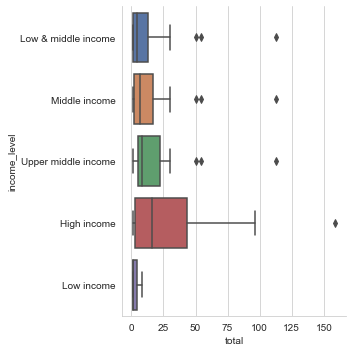

In [120]:
#Plotting the boxplot, which shows the medal distribution for each income level
sns.set_style("whitegrid")

plt.figure(figsize=(10,8))
sns.catplot(
    data=y, y="income_level", x="total",
    kind="box", dodge=False,  palette='deep'
)

In [121]:
#Calculate the sum of medals acheived by every income level
medal_income_level = pd.DataFrame(y.groupby(['income_level'])['total'].sum())
medal_income_level.reset_index(inplace =True )

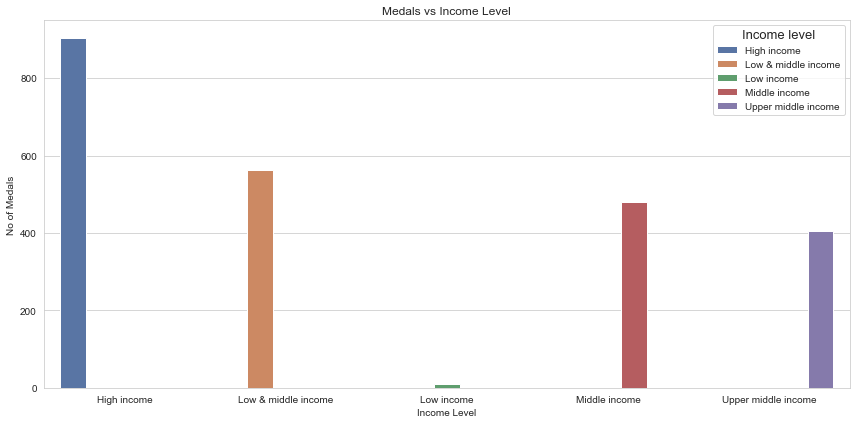

In [122]:
#plot the bar plot
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6), tight_layout=True)
ax = sns.barplot(x=medal_income_level['income_level'], y=medal_income_level['total'], hue=medal_income_level['income_level'], palette='deep')
ax.set(title='Medals vs Income Level' ,xlabel='Income Level', ylabel='No of Medals')
ax.legend(title='Income level', title_fontsize='13', loc='upper right')
plt.show()

<AxesSubplot:xlabel='gdppc', ylabel='total'>

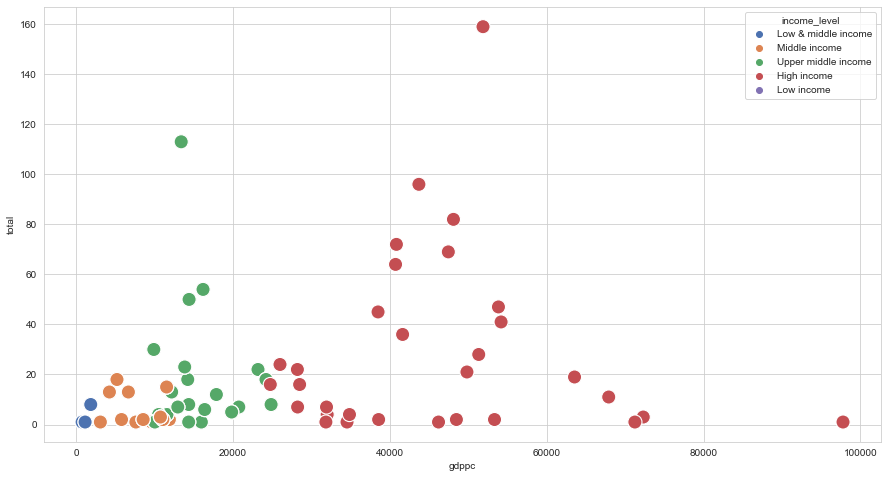

In [123]:
#plot the scatter plot, No of medals against the gddpc
sns.set_style("whitegrid")
region = y['region']
gdppc = y['gdppc']
total = y['total']
plt.figure(figsize=(15,8))
sns.scatterplot(x="gdppc",
                    y="total",
                    hue="income_level",
                    #style="event",
                    s =200,
                    data=y,
                    palette='deep'
               )


In [131]:
#Calculate the correlation coefficent between the gdpcc and the total number of medals
y['gdppc'] = pd.to_numeric(y['gdppc'], errors='coerce')
y['total'] = pd.to_numeric(y['total'], errors='coerce')
pearsons_coefficient = np.corrcoef(y['gdppc'],y['total'])

In [132]:
pearsons_coefficient

array([[nan, nan],
       [nan,  1.]])